# Visualizing Convolutions

This notebook was inspired by the following works:

* [How Convolutional Neural Networks work](https://youtu.be/FmpDIaiMIeA), by Brandon Rohrer
* [Understand Transposed Convolutions](https://towardsdatascience.com/understand-transposed-convolutions-and-build-your-own-transposed-convolution-layer-from-scratch-4f5d97b2967), by Kuan Wei

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt


In [2]:
def show_as_image(img):
    r, g, b = img.clone(), img.clone(), img.clone()
    # negative values will be shown in red
    r = r.abs()
    g[g < 0] = 0.
    b[b < 0] = 0.
    image_rgb = torch.stack([r, g, b]).float()
    image_pil = to_pil_image(image_rgb)
    plt.axis('off')
    plt.imshow(image_pil)
    plt.show()


# Conv2d & ConvTranspose2D

In [3]:
def conv2d(data, kernel, stride=1, padding=0):
    data_h, data_w = data.shape
    data_padded = F.pad(data, (padding, padding, padding, padding))
    kernel_h, kernel_w = kernel.shape
    output_h = (data_h - kernel_h + 2 * padding) // stride + 1
    output_w = (data_w - kernel_w + 2 * padding) // stride + 1
    output = torch.zeros((output_h, output_w))
    for i in range(0, data_padded.shape[0] - kernel_h + 1, stride):
        for j in range(0, data_padded.shape[1] - kernel_w + 1, stride):
            # print(f"({i},{j})")
            region = data_padded[i:i+kernel_h, j:j+kernel_w]
            output[i//stride, j//stride] = torch.sum(region * kernel)
    return output


def convtranspose2d(data, kernel, stride=1, padding=0):
    data_h, data_w = data.shape
    kernel_h, kernel_w = kernel.shape
    output_h = (data_h - 1) * stride + kernel_h - 2 * padding
    output_w = (data_w - 1) * stride + kernel_w - 2 * padding
    output = torch.zeros((output_h, output_w))
    for i in range(0, data_h, stride):
        for j in range(0, data_w, stride):
            # print(f"({i},{j})")
            region = data[i, j]
            output[i:i+kernel_w, j:j+kernel_w] += region * kernel
    return output


# X and O

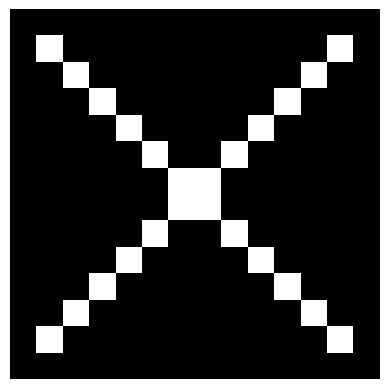

In [4]:
# 14x14 images, which is enough space to show an O & X

image_x = torch.tensor([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])

show_as_image(image_x)


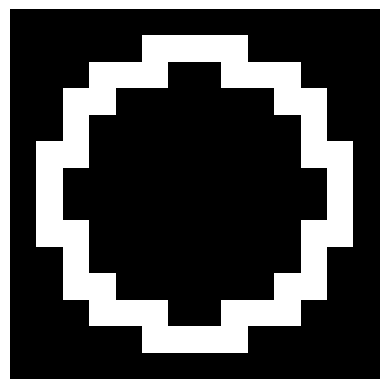

In [5]:
image_o = torch.tensor([
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])
show_as_image(image_o)


# 3x3 kernels

### Forward Diagonal Slash: /

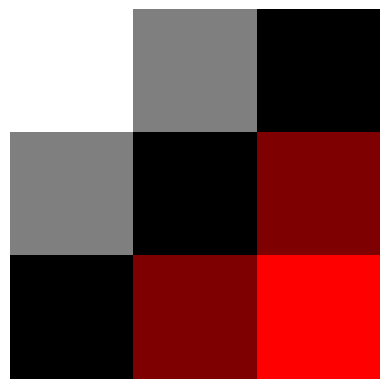

In [6]:
kernel_diagonal_forward = torch.tensor([
    [1, .5, 0],
    [.5, 0, -.5],
    [0, -.5, -1]
])

show_as_image(kernel_diagonal_forward)


### Backward Diagonal Slash: \

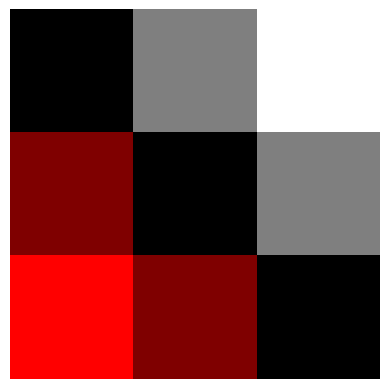

In [7]:
kernel_diagonal_backward = torch.tensor([
    [0, .5, 1],
    [-.5, 0, .5],
    [-1, -.5, 0]
])

show_as_image(kernel_diagonal_backward)


### Vertical

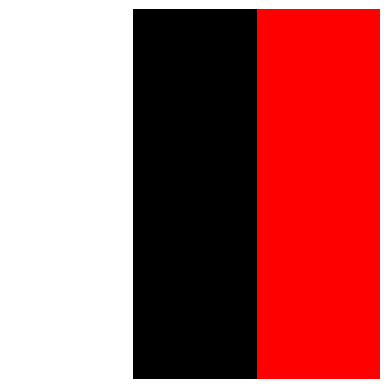

In [8]:
kernel_vertical = torch.tensor([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

show_as_image(kernel_vertical)


### Horizontal

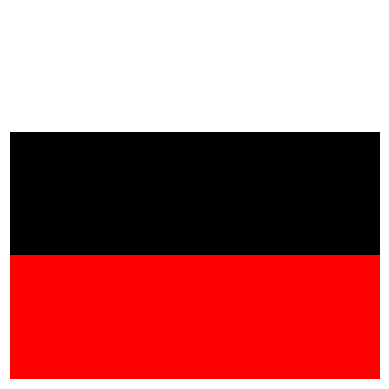

In [9]:
kernel_horzontal = torch.tensor([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

show_as_image(kernel_horzontal)


### Blur

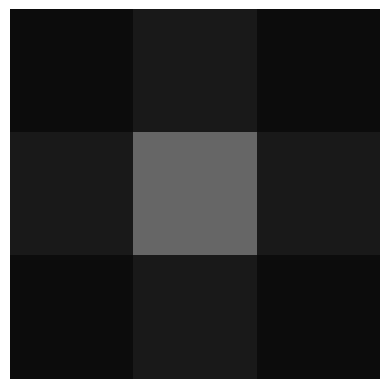

In [10]:
kernel_blur = torch.tensor([
    [.05, .1, .05],
    [.1, .4, .1],
    [.05, .1, .05]
])

show_as_image(kernel_blur)


## One Convolution on X

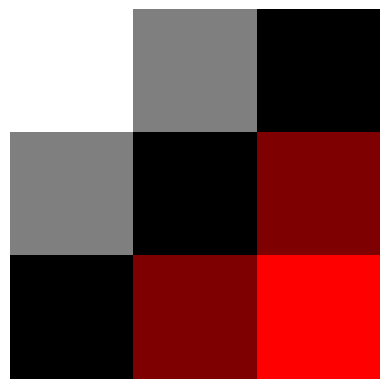

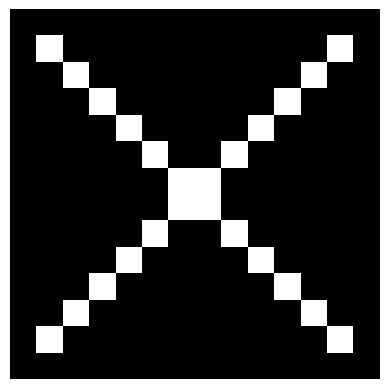

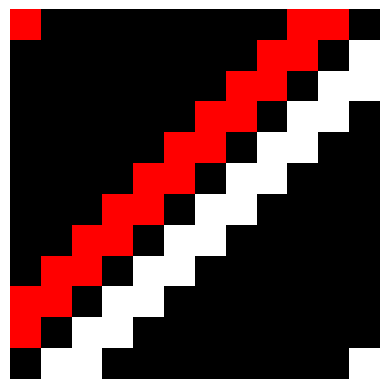

In [11]:
# Conv2d on X with forward slash kernel

show_as_image(kernel_diagonal_forward)
show_as_image(image_x)
x = conv2d(image_x, kernel_diagonal_forward, stride=1, padding=0)
show_as_image(x)


## One Convolution Transpose on X

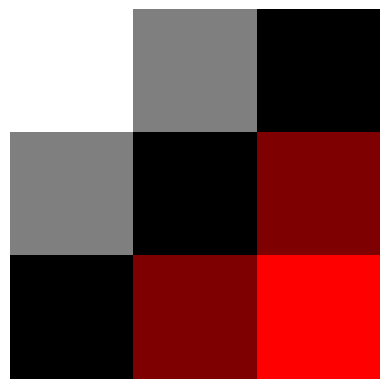

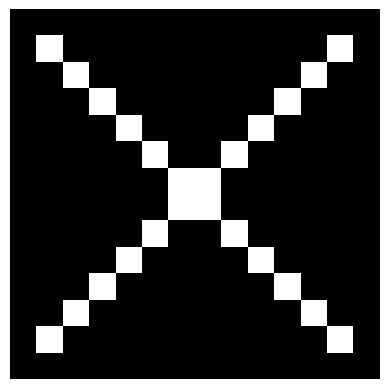

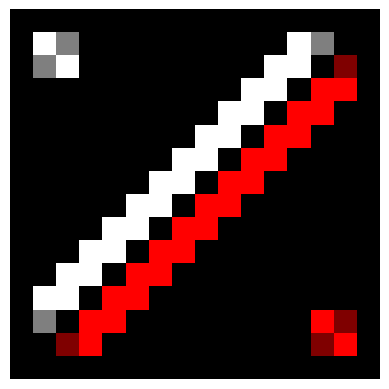

In [12]:
# ConvTranspose2d on X with forward slash kernel

show_as_image(kernel_diagonal_forward)
show_as_image(image_x)
x = convtranspose2d(image_x, kernel_diagonal_forward)
show_as_image(x)


## Sequence of Convolutions & Transposes on X

### Forward Slash: Once

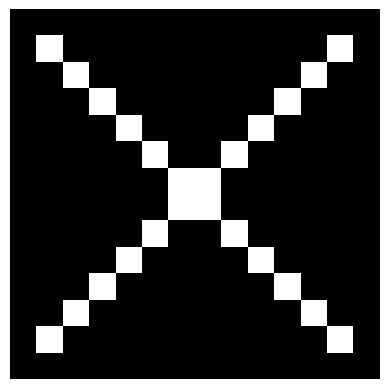

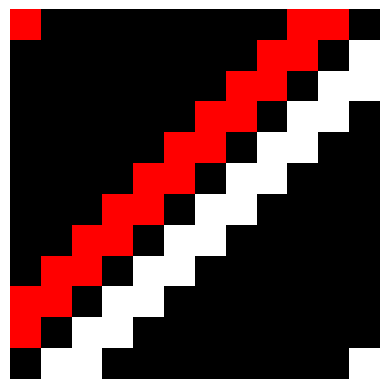

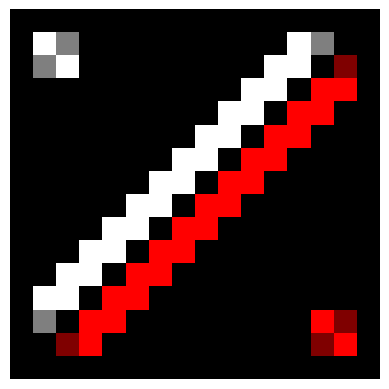

In [13]:
show_as_image(image_x)

x = conv2d(image_x, kernel_diagonal_forward)
show_as_image(x)

x = convtranspose2d(image_x, kernel_diagonal_forward)
show_as_image(x)


### Forward Slash: Thrice

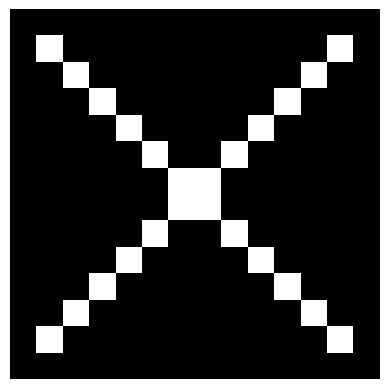

CONVOLUTIONS


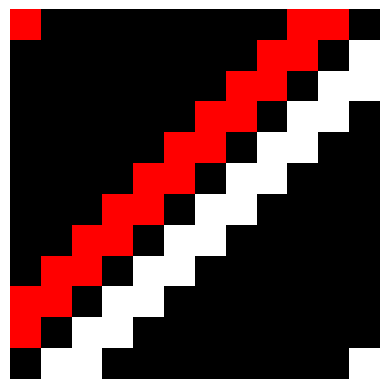

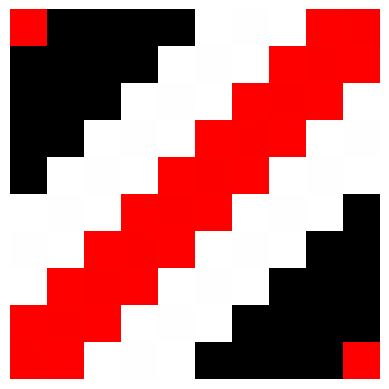

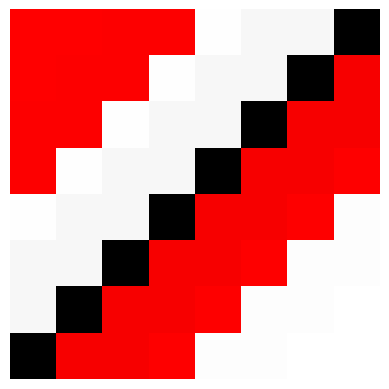

TRANSPOSES


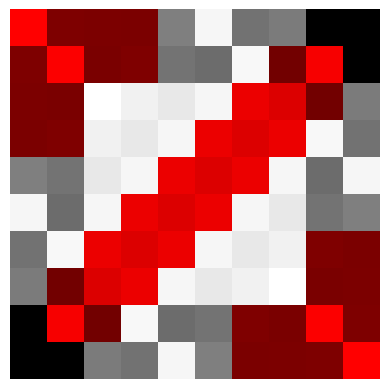

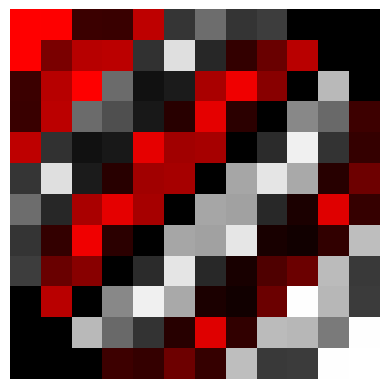

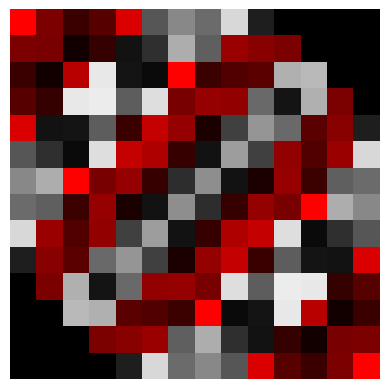

In [14]:
show_as_image(image_x)

print("CONVOLUTIONS")
x = conv2d(image_x, kernel_diagonal_forward)
show_as_image(x)
x = conv2d(x, kernel_diagonal_forward)
show_as_image(x)
x = conv2d(x, kernel_diagonal_forward)
show_as_image(x)

print("TRANSPOSES")
x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)
x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)
x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)


### Vertical: Once

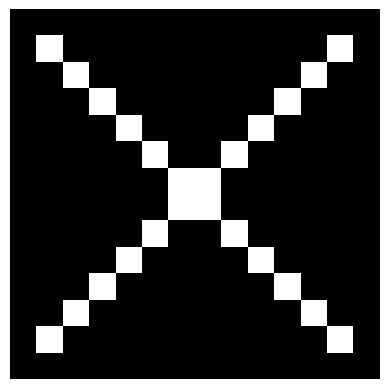

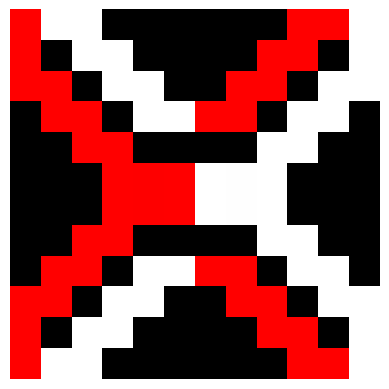

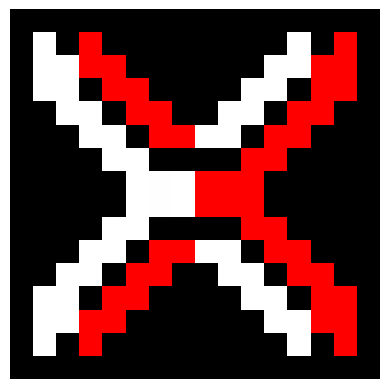

In [15]:
show_as_image(image_x)

x = conv2d(image_x, kernel_vertical)
show_as_image(x)

x = convtranspose2d(image_x, kernel_vertical)
show_as_image(x)


### Vertical: Thrice

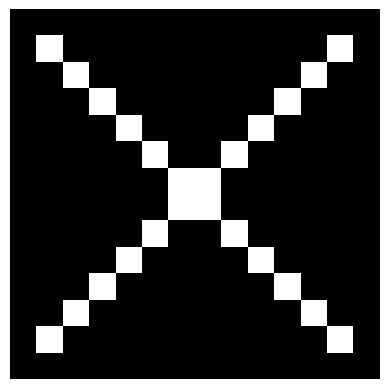

CONVOLUTIONS


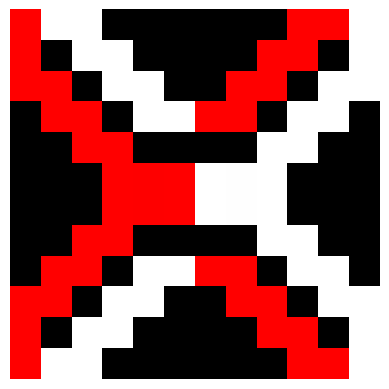

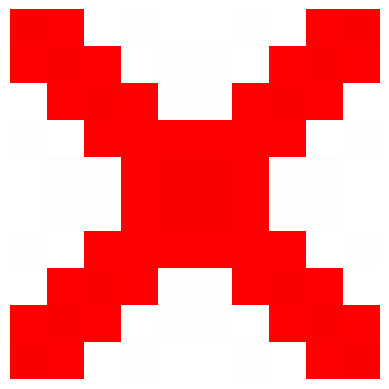

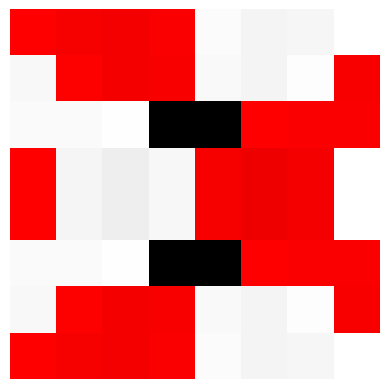

TRANSPOSES


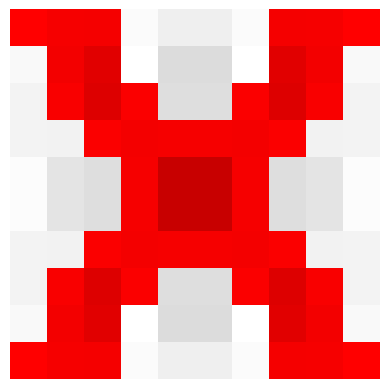

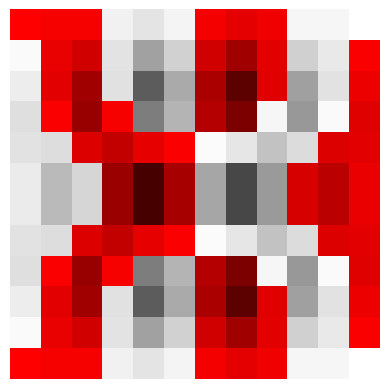

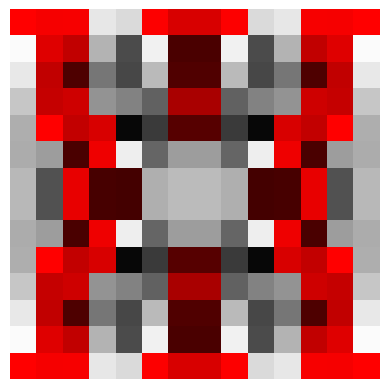

In [16]:
show_as_image(image_x)

print("CONVOLUTIONS")
x = conv2d(image_x, kernel_vertical)
show_as_image(x)
x = conv2d(x, kernel_vertical)
show_as_image(x)
x = conv2d(x, kernel_vertical)
show_as_image(x)

print("TRANSPOSES")
x = convtranspose2d(x, kernel_vertical)
show_as_image(x)
x = convtranspose2d(x, kernel_vertical)
show_as_image(x)
x = convtranspose2d(x, kernel_vertical)
show_as_image(x)


### Blur: Once

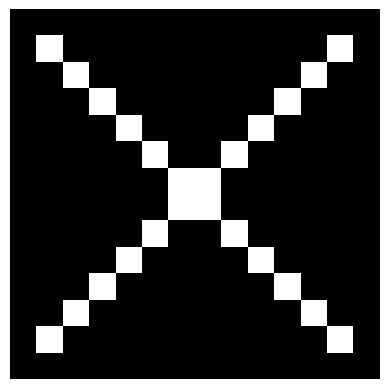

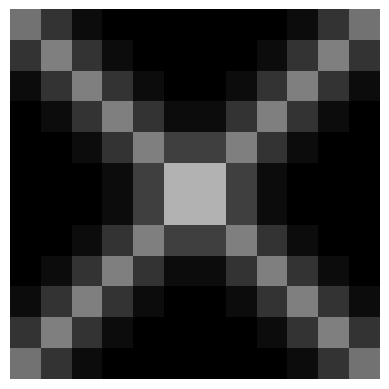

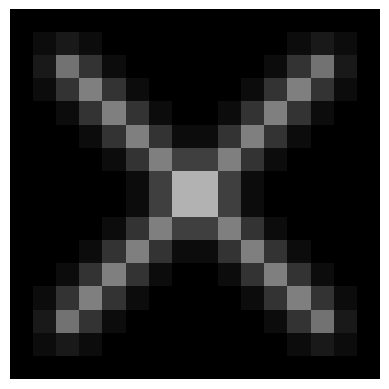

In [17]:
show_as_image(image_x)

x = conv2d(image_x, kernel_blur)
show_as_image(x)

x = convtranspose2d(image_x, kernel_blur)
show_as_image(x)


### Blur: Thrice

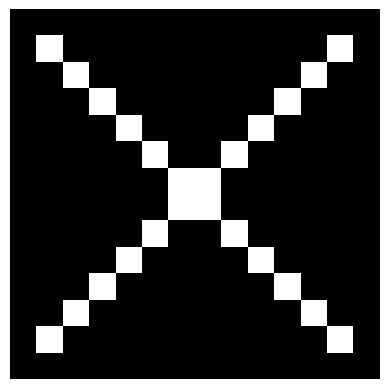

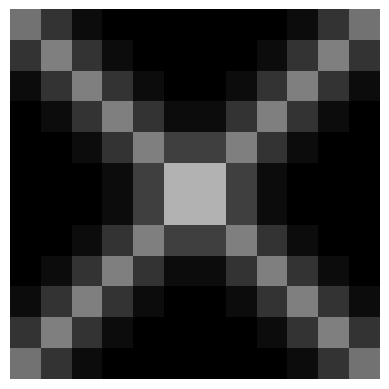

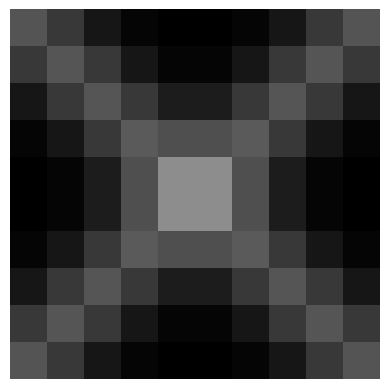

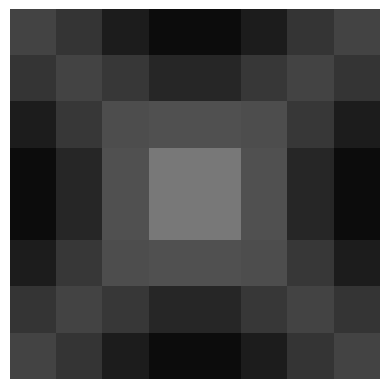

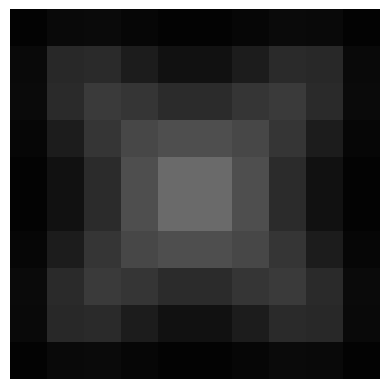

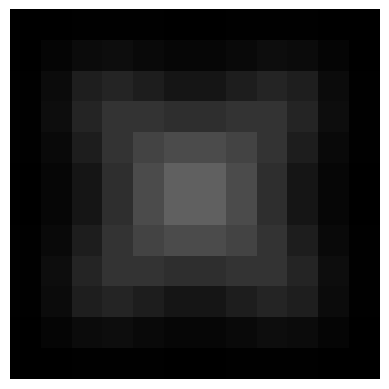

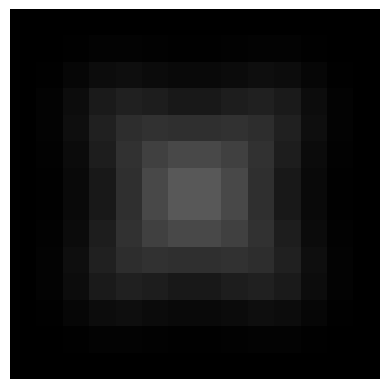

In [18]:
show_as_image(image_x)

x = conv2d(image_x, kernel_blur)
show_as_image(x)
x = conv2d(x, kernel_blur)
show_as_image(x)
x = conv2d(x, kernel_blur)
show_as_image(x)

x = convtranspose2d(x, kernel_blur)
show_as_image(x)
x = convtranspose2d(x, kernel_blur)
show_as_image(x)
x = convtranspose2d(x, kernel_blur)
show_as_image(x)


## Sequence of Convolutions & Transposes on O

### Forward Slash: Once

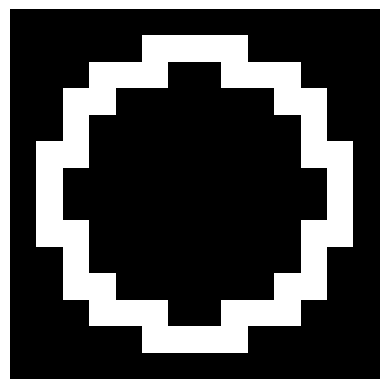

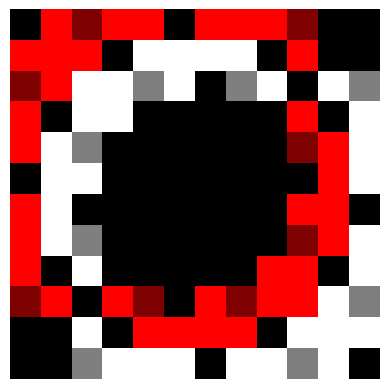

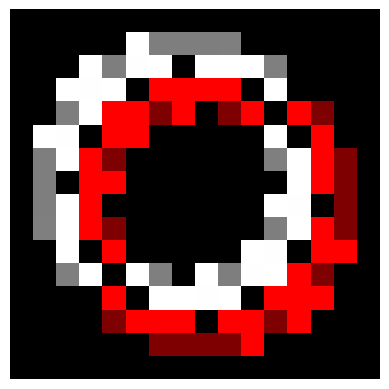

In [19]:
show_as_image(image_o)

x = conv2d(image_o, kernel_diagonal_forward)
show_as_image(x)

x = convtranspose2d(image_o, kernel_diagonal_forward)
show_as_image(x)


### Forward Slash: Thrice

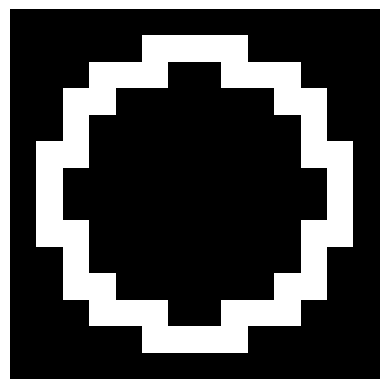

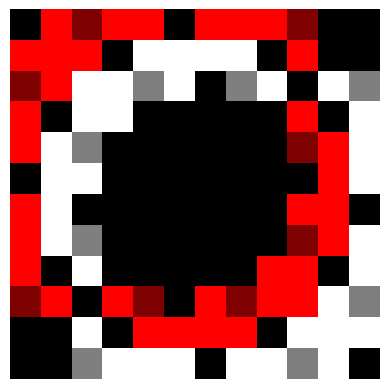

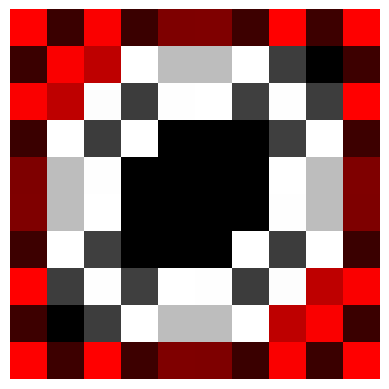

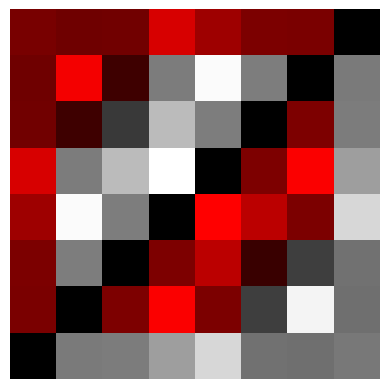

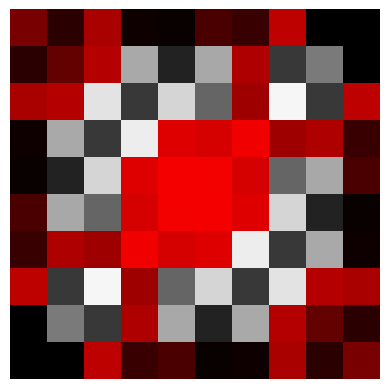

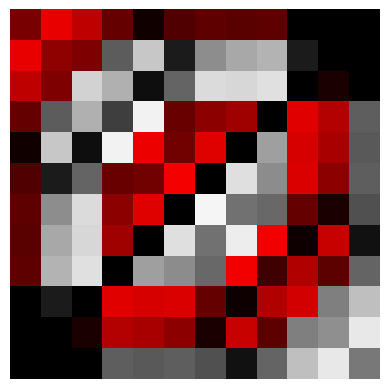

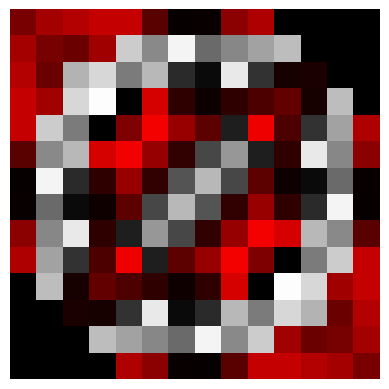

In [20]:
show_as_image(image_o)

x = conv2d(image_o, kernel_diagonal_forward)
show_as_image(x)
x = conv2d(x, kernel_diagonal_forward)
show_as_image(x)
x = conv2d(x, kernel_diagonal_forward)
show_as_image(x)

x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)
x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)
x = convtranspose2d(x, kernel_diagonal_forward)
show_as_image(x)



### Blur: Once

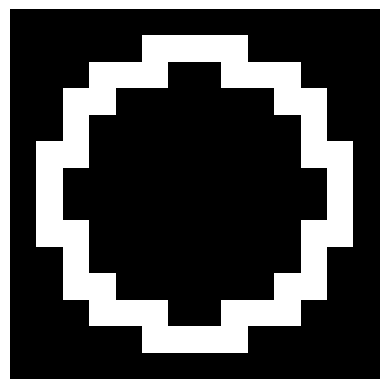

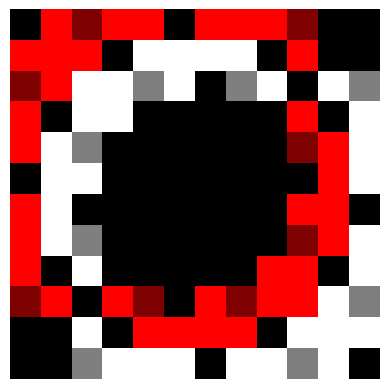

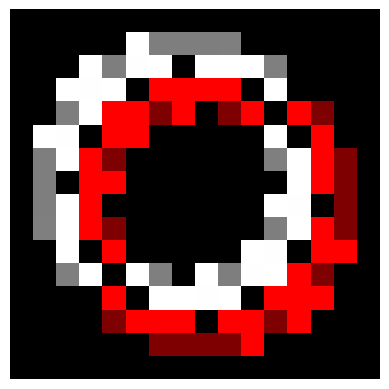

In [21]:
show_as_image(image_o)

x = conv2d(image_o, kernel_diagonal_forward)
show_as_image(x)

x = convtranspose2d(image_o, kernel_diagonal_forward)
show_as_image(x)


### Blur: Thrice

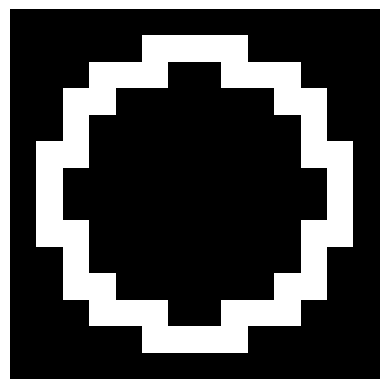

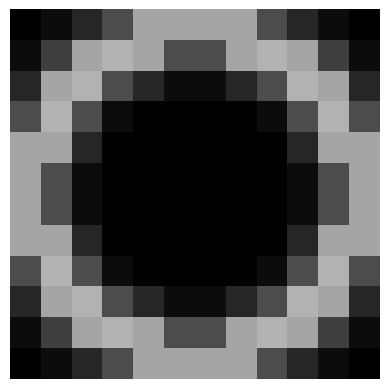

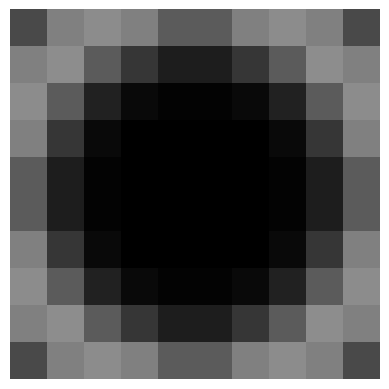

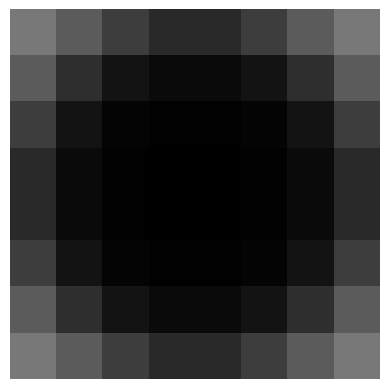

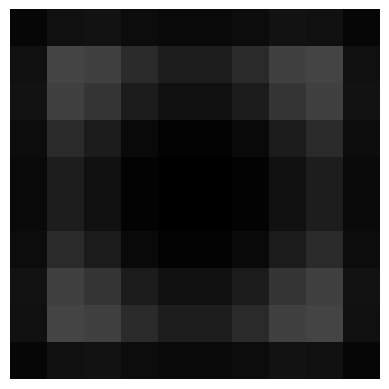

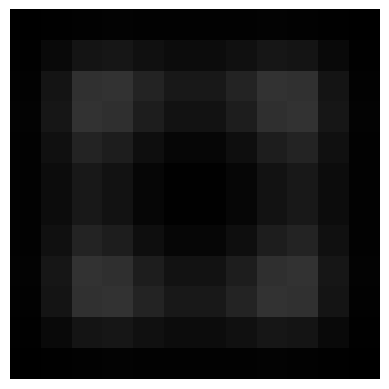

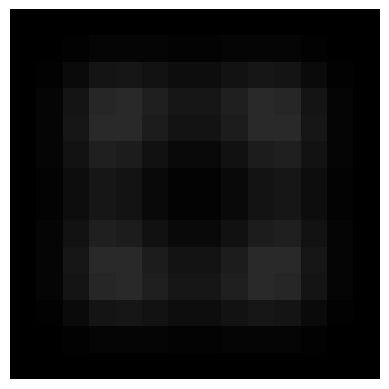

In [22]:
show_as_image(image_o)

x = conv2d(image_o, kernel_blur)
show_as_image(x)
x = conv2d(x, kernel_blur)
show_as_image(x)
x = conv2d(x, kernel_blur)
show_as_image(x)

x = convtranspose2d(x, kernel_blur)
show_as_image(x)
x = convtranspose2d(x, kernel_blur)
show_as_image(x)
x = convtranspose2d(x, kernel_blur)
show_as_image(x)
